# Tutorial file for the r-place-emergence package

#### Imports

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import rplacem.canvas_part as rp
import rplacem.thermo as th
import pickle
import os
import seaborn as sns
import json
import Variables.Variables as var

### Choose an index from the atlas.json file to identify a composition of interest

The r/place [atlas](https://place-atlas.stefanocoding.me/about)
"is an atlas aiming to chart all the artworks created during the r/place April Fools event on Reddit in 2022. It is made with information to each artwork of the canvas provided by the community. The original code was developed by Roland Rytz and is available under the free AGPL license on GitHub. The currently maintained version of the website is managed by Stefano Haagmans and is obtainable under the same license within a [GitHub fork](https://github.com/placeAtlas/atlas). Initial images are provided by Alex Tsernoh."

Each "artwork" or as we call it here, "composition", is indexed according to a string of numbers, found in the atlas.json file. Here, we choose one arbitrarily for demonstration

In [2]:
atlas_id_index = '000297' 

### Load all the pixel data from the npz file

Next, we load all the pixel change data from the npz file. This npz file is a condensed, time-sorted version of the 79 data files provided by reddit from the 2022 r/place experiment. The get_all_pixel_changes() function loads this data and places it into an array with 6 columns

In [3]:
pixel_changes_all = rp.get_all_pixel_changes()

Print the columns of the pixel_changes_all array for reference

In [4]:
print('  seconds: ' + str(pixel_changes_all['seconds']))
print('  x coord: ' + str(pixel_changes_all['xcoor']))
print('  y coord: ' + str(pixel_changes_all['ycoor']))
print('  user id: ' + str(pixel_changes_all['user']))
print(' color id: ' + str(pixel_changes_all['color']))
print('mod event: ' + str(pixel_changes_all['moderator']))


  seconds: [3.15000000e-01 1.26710000e+01 1.66260000e+01 ... 3.00590172e+05
 3.00590195e+05 3.00590207e+05]
  x coord: [  42  999   44 ...  770 1046    0]
  y coord: [  42  999   42 ...  866 1721 1999]
  user id: [4068945 4068946 4068947 ... 2778754 1591567  583562]
 color id: [16  7 10 ... 31 31 31]
mod event: [False False False ... False False False]


### Define two types of CanvasPart objects

The CanvasPart class is a superclass with subclasses CanvasComposition and CanvasArea. You can think of a CanvasPart as a part of the canvas defined by a spatial border, which can be either defined by the edge of a particular artwork composition as defined by the r/place Atlas or it can be defined by an arbitrary user-defined border path, which can take any shape. The maximum size of a user-defined border is the size of the canvas itself. 

##### Define a CanvasCompsition object

To define a CanvasComposition object, you must supply the atlas composition id index and the pixel change data loaded from the npz file. The constructor then finds and sets the border path, the x and y coordinates inside the border, and the pixel changes within the border of the composition. 

In [5]:
canvas_comp = rp.CanvasPart(True, id = atlas_id_index)
data_path=os.path.join(os.getcwd(),'data')
atlas_path = os.path.join(data_path,'atlas.json')
composition_classification_file = open(atlas_path)
atlas = json.load(composition_classification_file)

rp.check_time('rp.CanvasPart(True, id=atlas_id_index, pixel_changes_all=pixel_changes_all, atlas=atlas)')

         436378 function calls (436297 primitive calls) in 1.043 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.043    1.043 {built-in method builtins.exec}
        1    0.000    0.000    1.043    1.043 <string>:1(<module>)
        1    0.000    0.000    1.043    1.043 canvas_part.py:74(__init__)
        1    0.708    0.708    1.030    1.030 canvas_part.py:310(find_pixel_changes_in_boundary)
     13/7    0.291    0.022    0.322    0.046 {built-in method numpy.core._multiarray_umath.implement_array_function}
        1    0.000    0.000    0.224    0.224 <__array_function__ internals>:177(append_fields)
        1    0.000    0.000    0.111    0.111 recfunctions.py:654(append_fields)
        2    0.000    0.000    0.098    0.049 <__array_function__ internals>:177(where)
        1    0.000    0.000    0.090    0.090 <__array_function__ internals>:177(merge_arrays)
   419111    0.018    0.000 

In [6]:
print('Canvas composition pixel changes: \n' + str(canvas_comp.pixel_changes) + '\n \n')
print('Canvas composition border path: \n' + str(canvas_comp.border_path) + '\n \n')
print('Canvas composition coordinates: \n' + str(canvas_comp.coords) + '\n \n')

Canvas composition pixel changes: 
[(99663.452, 1803, 551, 4850869, 5, False, True)
 (99670.916, 1813, 559, 5678690, 2, False, True)
 (99682.882, 1882, 571, 3066810, 5, False, True) ...
 (300573.411, 1874, 606, 1743202, 31, False, True)
 (300583.048, 1890, 573, 8855771, 31, False, True)
 (300584.884, 1889, 543, 9899334, 31, False, True)]
 

Canvas composition border path: 
[[[1800  539]
  [1890  539]
  [1890  623]
  [1800  623]]]
 

Canvas composition coordinates: 
[[1800 1800 1800 ... 1890 1890 1890]
 [ 539  540  541 ...  621  622  623]]
 



##### Define a CanvasArea object
To define a CanvasArea object, you must supply the border path and the pixel changes from the npz file. 
The border path is a numpy array of x,y points that form the path of the border of the canvas

In [7]:
border_path = np.array([[[0,0],[0,1000],[1000,1000],[1000,0]]])
print(border_path[:,0])
print(border_path[:,1])

#rp.check_time('rp.CanvasArea(border_path, pixel_changes_all)')
canvas_area = rp.CanvasPart(False, border_path=border_path, pixel_changes_all=pixel_changes_all)

[[0 0]]
[[   0 1000]]


In [8]:
print('Canvas area pixel changes: \n' + str(canvas_area.pixel_changes) + '\n \n')
print('Canvas area border path: \n' + str(canvas_area.border_path) + '\n \n')
print('Canvas area coordinates: \n' + str(canvas_area.coords)+ '\n \n')

Canvas area pixel changes: 
[(0.315, 42, 42, 4068945, 16, False, True)
 (12.671, 999, 999, 4068946, 7, False, True)
 (16.626, 44, 42, 4068947, 10, False, True) ...
 (300589.747, 355, 128, 1071800, 31, False, True)
 (300590.066, 408, 493, 2119677, 31, False, True)
 (300590.172, 770, 866, 2778754, 31, False, True)]
 

Canvas area border path: 
[[[   0    0]
  [   0 1000]
  [1000 1000]
  [1000    0]]]
 

Canvas area coordinates: 
[[   0    0    0 ... 1000 1000 1000]
 [   0    1    2 ...  998  999 1000]]
 



### Get the pixel changes over time, plot, and save a movie of the frames

Now, we can start to examine how the two CanvasPart objects change over time. 
Lets' choose a time step interval of 900 seconds (15 minutes), and a total time 
of 20 hours (20*3600 seconds).

In [9]:
time_interval= 30*60 #seconds
time_end = 80*3600 #seconds
time_start = 30*3600
times_comp = np.arange(time_start, time_end, time_interval)
times_comp[0]=0

First, let's plot the canvas_comp object for the specified time steps. You'll notice the plotting function returns a list of indices that allow us to quickly select the pixel change data at different time points inside the boundary. The time_inds_list_comp will come in handy for time-step calculations later on. 

Ran 1.0101010101010102 %% of the steps
Ran 10.1010101010101 %% of the steps
Ran 20.2020202020202 %% of the steps
Ran 30.303030303030305 %% of the steps
Ran 40.4040404040404 %% of the steps
Ran 50.505050505050505 %% of the steps
Ran 60.60606060606061 %% of the steps
Ran 70.70707070707071 %% of the steps
Ran 80.8080808080808 %% of the steps
Ran 90.9090909090909 %% of the steps
produced 99 images vs time


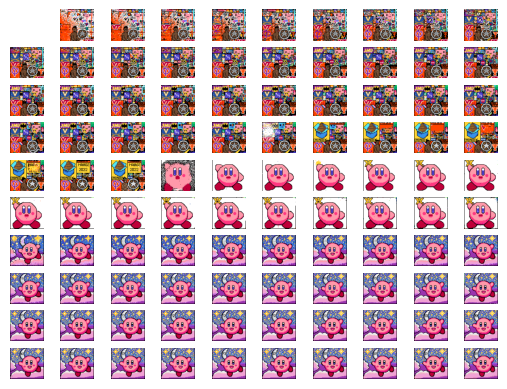

In [10]:
file_size_bmp, file_size_png, time_inds_list_comp = rp.save_part_over_time(canvas_comp,
                                                                      times_comp, #seconds,
                                                                      delete_bmp = True, 
                                                                      delete_png = False, # keep the png files
                                                                      show_plot = True)

We can do the same for the canvas_area object

Ran 1.2658227848101267 %% of the steps
Ran 10.126582278481013 %% of the steps
Ran 20.253164556962027 %% of the steps
Ran 30.379746835443036 %% of the steps
Ran 40.50632911392405 %% of the steps
Ran 50.63291139240506 %% of the steps
Ran 60.75949367088607 %% of the steps
Ran 70.88607594936708 %% of the steps
Ran 81.0126582278481 %% of the steps
Ran 91.13924050632912 %% of the steps
produced 79 images vs time


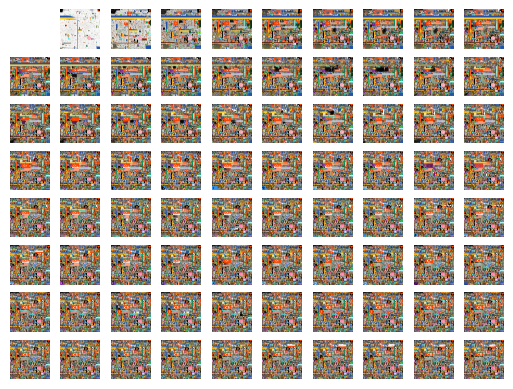

In [11]:
time_interval= 60*60 #seconds
time_end = 80*3600 #seconds
time_start = 0
times_area = np.arange(time_start, time_end, time_interval)

file_size_bmp_area, file_size_png_area, time_inds_list_area = rp.save_part_over_time(canvas_area,
                                                                      times_area,
                                                                      part_name = 'area', # only for name of output
                                                                      delete_bmp = True,
                                                                      delete_png = False,
                                                                      show_plot = True)

##### Save the frames as a movie

In [12]:
image_path = os.path.join(os.getcwd(), 'figs', 'history_000297','VsTime')
image_path_area = os.path.join(os.getcwd(), 'figs', 'history_area','VsTime')

Save frames as a movie

In [13]:
rp.save_movie(image_path, 
              movie_tool='moviepy',
              fps=6,
              codec='mpeg4',#'libx264',
              video_type='mov')# 'mp4'

rp.save_movie(image_path_area, 
              movie_tool='moviepy',
              fps=6,
              codec='mpeg4',#'libx264',
              video_type='mov')# 'mp4'

Moviepy - Building video /Users/annie/Code/Repositories/r-place-emergence/figs/history_000297/VsTime/canvaspart_fps6.mov.
Moviepy - Writing video /Users/annie/Code/Repositories/r-place-emergence/figs/history_000297/VsTime/canvaspart_fps6.mov



Moviepy - Done !
Moviepy - video ready /Users/annie/Code/Repositories/r-place-emergence/figs/history_000297/VsTime/canvaspart_fps6.mov


Moviepy - Building video /Users/annie/Code/Repositories/r-place-emergence/figs/history_area/VsTime/canvaspart_fps6.mov.
Moviepy - Writing video /Users/annie/Code/Repositories/r-place-emergence/figs/history_area/VsTime/canvaspart_fps6.mov



Moviepy - Done !
Moviepy - video ready /Users/annie/Code/Repositories/r-place-emergence/figs/history_area/VsTime/canvaspart_fps6.mov


#### Saving and loading the timestep data

In [14]:
rp.save_canvas_part_time_steps(canvas_comp,  
                               time_inds_list_comp,
                               times_comp,
                               file_size_bmp,
                               file_size_png)

In [15]:
(canvas_comp, 
 time_inds_list_comp,
 times_comp,
 file_size_bmp,
 file_size_png) = rp.load_canvas_part_time_steps()

### Plot the compressed file size ratio over time

Next, we'll perform calculations to further analyze the CanvasPart objects. We can use the compressed file size as a way to characterize the 'complexity' of a part of the canvas. We'll plot the ratio of the compressed file size to the original file size for both the canvas composition and the canvas area

#### Calculate number of pixel changes and touched pixels for thermodynamic quantities


In [16]:
(num_pixel_changes, 
 num_touched_pixels,
 num_users) =  th.calc_num_pixel_changes(canvas_comp,
                                         time_inds_list_comp,
                                         time_interval)

##### Plot

(100,)
(100,)


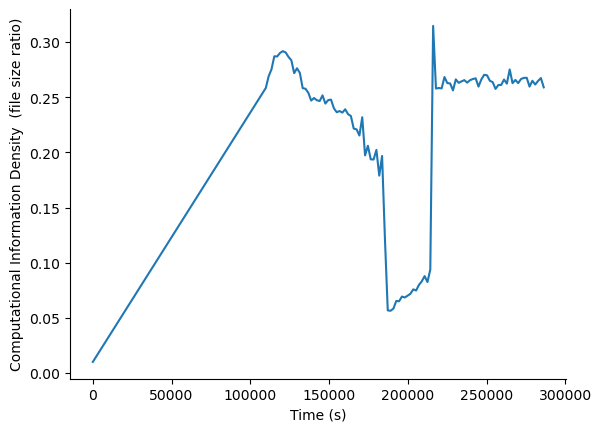

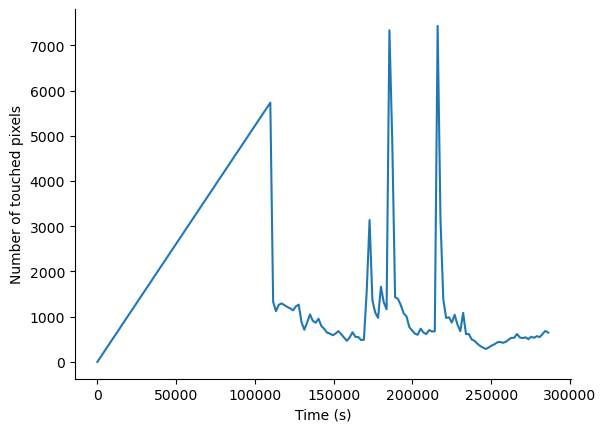

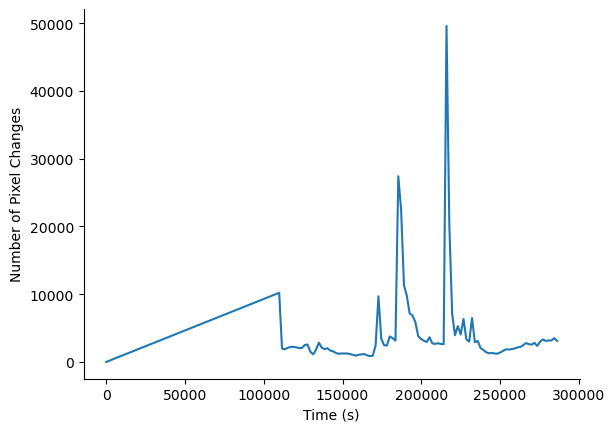

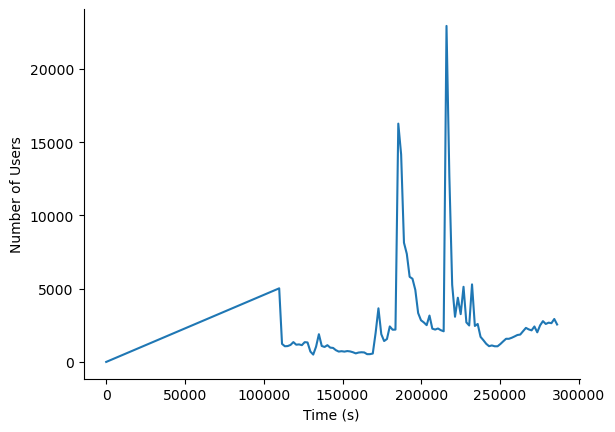

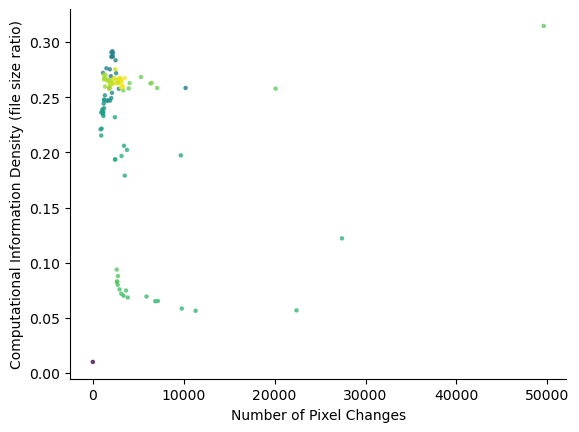

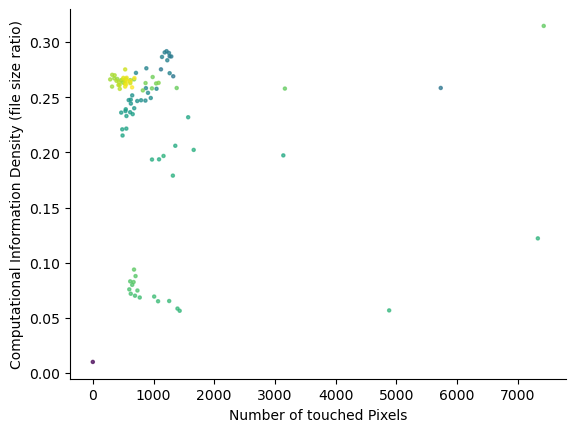

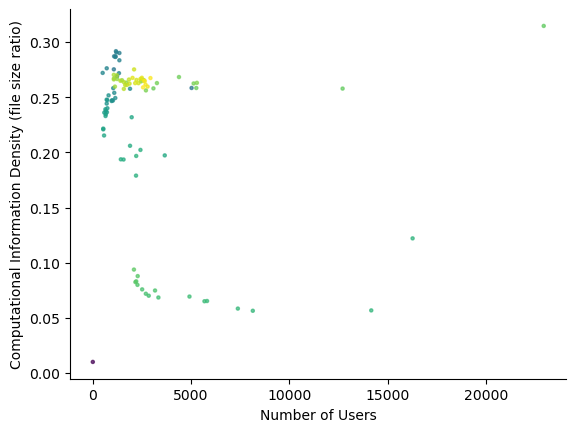

In [17]:
(fig_cid_vs_time, 
fig_num_touched_pix_vs_time, 
fig_num_pix_changes_vs_time, 
fig_users_vs_time,
fig_cid_vs_num_pix_changes,
fig_cid_vs_num_touched_pix,
fig_cid_vs_num_users)= th.plot_compression_vs_pixel_changes(num_pixel_changes, 
                                                            num_touched_pixels, 
                                                            num_users,
                                                            times_comp,
                                                            file_size_png, 
                                                            file_size_bmp)

manipulate the plots

(0.0, 5000.0)

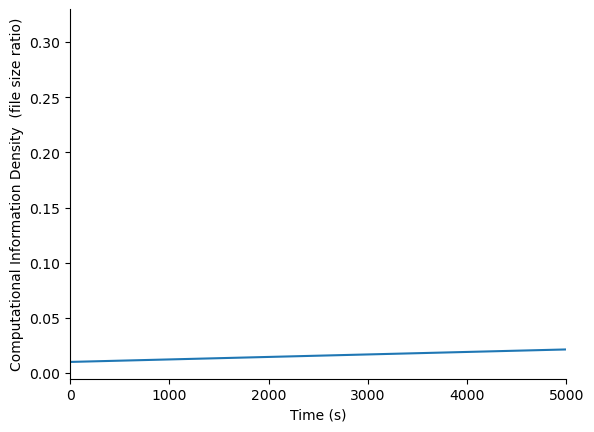

In [18]:
plt.figure()
plt.sca(fig_cid_vs_time.gca())
plt.xlim([0,5000])

### Calculate the stability

In [19]:
stability_vs_time = th.stability(canvas_comp,
                                  save_images=False,
                                  t_lims=times_comp,
                                  save_pickle=False
                                  )

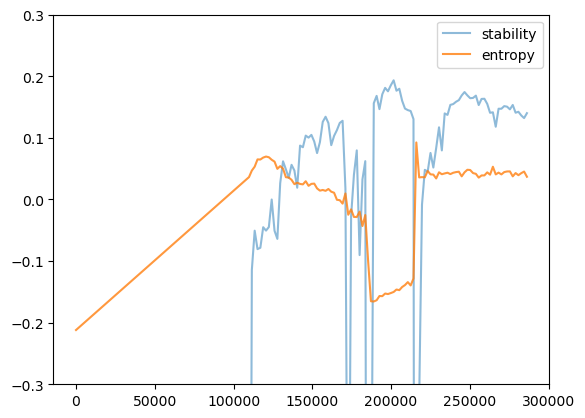

In [30]:
plt.figure()
entropy = file_size_png/file_size_bmp

plt.plot(times_comp[1:], 8*(stability_vs_time-np.mean(stability_vs_time)), alpha=0.5, label='stability')
plt.plot(times_comp, (entropy-np.mean(entropy)), alpha=0.8, label='entropy')
plt.ylim([-.3, .3])
plt.legend()